# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import gmaps

# Import API key
from api_keys import api_key
from api_keys import gkey

#Access maps with gkey
gmaps.configure(api_key=gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=3000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
lat_lngs = zip(lats, lngs)
list_lats_lngs = list(lat_lngs)
#print(list_lats_lngs)

In [17]:
#Seeing how spread out the coordinates are to ensure full coverage of the globe
#figure_layout = {
#    'width': '400px',
#    'height': '300px',
#    'border': '1px solid black',
#    'padding': '1px',
#    'margin': '0 auto 0 auto'}

#fig = gmaps.figure(layout=figure_layout)
#markers = gmaps.marker_layer(list_lats_lngs)
#fig.add_layer(markers)
#fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_sets = []
weather_list = []

for x in range(1,15):
    city_set = random.sample(cities, 50)
    city_sets.append(city_set)

print("Beginning Data Retrieval")
print("------------------------")    

weather_list = []
    
for city in cities:
        if len(weather_list) == 1000:
            print("End of Data Retrieval")
            break
        try:
            print(f"Processing Record {cities.index(city) + 1} | {city}")

            city_url = url + "appid=" + api_key + "&q=" + city
            response = requests.get(city_url)
            city_weather = response.json()    

            weather_list.append({
                "City": city_weather['name'],
                "Country": city_weather['sys']['country'],
                "Temperature": (city_weather['main']['temp'] - 273.15),
                "Humidity": city_weather['main']['humidity'],
                "Cloudiness": city_weather['clouds']['all'],
                "Max Temp": (city_weather['main']['temp_max'] - 273.15),
                "Wind Speed": city_weather['wind']['speed'],
                "Latitude": city_weather['coord']['lat'],
                "Longitude": city_weather['coord']['lon']
            })
        except KeyError:
            print("City not found.  Skipping...")

Beginning Data Retrieval
------------------------
Processing Record 1 | rikitea
Processing Record 2 | camacupa
Processing Record 3 | bredasdorp
Processing Record 4 | yellowknife
Processing Record 5 | saskylakh
Processing Record 6 | owo
Processing Record 7 | taolanaro
City not found.  Skipping...
Processing Record 8 | east london
Processing Record 9 | fernandopolis
Processing Record 10 | alamosa
Processing Record 11 | dharmanagar
Processing Record 12 | balkanabat
Processing Record 13 | tieli
Processing Record 14 | pevek
Processing Record 15 | bambous virieux
Processing Record 16 | lerwick
Processing Record 17 | illoqqortoormiut
City not found.  Skipping...
Processing Record 18 | kahului
Processing Record 19 | cape town
Processing Record 20 | trinidad
Processing Record 21 | ushuaia
Processing Record 22 | inuvik
Processing Record 23 | saqqez
Processing Record 24 | labuhan
Processing Record 25 | bandarbeyla
Processing Record 26 | sentyabrskiy
City not found.  Skipping...
Processing Record 

Processing Record 231 | saint-ambroise
Processing Record 232 | betanzos
Processing Record 233 | timra
Processing Record 234 | itarema
Processing Record 235 | margate
Processing Record 236 | belyy yar
Processing Record 237 | berdigestyakh
Processing Record 238 | chokurdakh
Processing Record 239 | hovd
Processing Record 240 | biloela
Processing Record 241 | ormara
Processing Record 242 | cradock
Processing Record 243 | ahipara
Processing Record 244 | mahon
Processing Record 245 | farah
Processing Record 246 | oktyabrskiy
Processing Record 247 | maningrida
Processing Record 248 | balkhash
Processing Record 249 | cherskiy
Processing Record 250 | hobyo
Processing Record 251 | kaeo
Processing Record 252 | mackenzie
Processing Record 253 | papetoai
Processing Record 254 | keuruu
Processing Record 255 | dikson
Processing Record 256 | udachnyy
Processing Record 257 | ryotsu
Processing Record 258 | foz
Processing Record 259 | terekli-mekteb
Processing Record 260 | dwarka
Processing Record 261 | 

Processing Record 458 | binga
Processing Record 459 | berasia
Processing Record 460 | zhireken
Processing Record 461 | gaozhou
Processing Record 462 | aksu
Processing Record 463 | teknaf
Processing Record 464 | kavaratti
Processing Record 465 | road town
Processing Record 466 | sortavala
Processing Record 467 | talnakh
Processing Record 468 | alofi
Processing Record 469 | tiruvottiyur
City not found.  Skipping...
Processing Record 470 | kemijarvi
City not found.  Skipping...
Processing Record 471 | ariquemes
Processing Record 472 | ewa beach
Processing Record 473 | koslan
Processing Record 474 | sidi ali
Processing Record 475 | coihaique
Processing Record 476 | darhan
Processing Record 477 | sao joao da barra
Processing Record 478 | talkha
Processing Record 479 | morant bay
Processing Record 480 | moba
Processing Record 481 | caravelas
Processing Record 482 | palana
Processing Record 483 | salinas
Processing Record 484 | harper
Processing Record 485 | bolungarvik
City not found.  Skipp

City not found.  Skipping...
Processing Record 688 | ilam
Processing Record 689 | ardistan
City not found.  Skipping...
Processing Record 690 | xudat
Processing Record 691 | charters towers
Processing Record 692 | pangani
Processing Record 693 | mangan
Processing Record 694 | ostrovnoy
Processing Record 695 | znamenskoye
Processing Record 696 | pokhara
Processing Record 697 | touros
Processing Record 698 | beringovskiy
Processing Record 699 | tambovka
Processing Record 700 | deh rawud
City not found.  Skipping...
Processing Record 701 | kachiry
Processing Record 702 | cornwall
Processing Record 703 | soria
Processing Record 704 | meadow lake
Processing Record 705 | ust-kamchatsk
City not found.  Skipping...
Processing Record 706 | comodoro rivadavia
Processing Record 707 | uribia
Processing Record 708 | moron
Processing Record 709 | lesosibirsk
Processing Record 710 | tautira
Processing Record 711 | empalme
Processing Record 712 | mosetse
Processing Record 713 | morrisburg
Processing R

Processing Record 913 | suamico
Processing Record 914 | lichinga
Processing Record 915 | pangai
Processing Record 916 | torun
Processing Record 917 | abhar
Processing Record 918 | inirida
Processing Record 919 | valparaiso
Processing Record 920 | pacifica
Processing Record 921 | oparino
Processing Record 922 | neryungri
Processing Record 923 | oyama
Processing Record 924 | maracas
Processing Record 925 | acapulco
Processing Record 926 | merced
Processing Record 927 | kamiiso
Processing Record 928 | mongu
Processing Record 929 | dickinson
Processing Record 930 | karamay
City not found.  Skipping...
Processing Record 931 | mitu
Processing Record 932 | greenville
Processing Record 933 | mwense
Processing Record 934 | trelew
Processing Record 935 | maumere
Processing Record 936 | golden
Processing Record 937 | saint-louis
Processing Record 938 | pontianak
Processing Record 939 | cootamundra
Processing Record 940 | novopokrovka
Processing Record 941 | umm durman
City not found.  Skipping...

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_df = pd.DataFrame(weather_list)
weather_df['Temperature (F)'] = (weather_df['Temperature'] * (9/5)) + 32
weather_df['Max Temp (F)'] = (weather_df['Max Temp'] * (9/5)) + 32
weather_df.to_csv('City Weather.csv')

weather_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temp,Temperature,Wind Speed,Temperature (F),Max Temp (F)
0,Rikitea,5,PF,78,-23.12,-134.97,23.009,23.009,8.51,73.4162,73.4162
1,Camacupa,0,AO,22,-12.02,17.48,12.509,12.509,0.79,54.5162,54.5162
2,Bredasdorp,0,ZA,87,-34.53,20.04,9.000,7.940,1.50,46.2920,48.2000
3,Yellowknife,75,CA,87,62.45,-114.38,15.000,13.820,3.10,56.8760,59.0000
4,Saskylakh,77,RU,56,71.97,114.09,14.708,14.708,1.93,58.4744,58.4744


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

(0, 120)

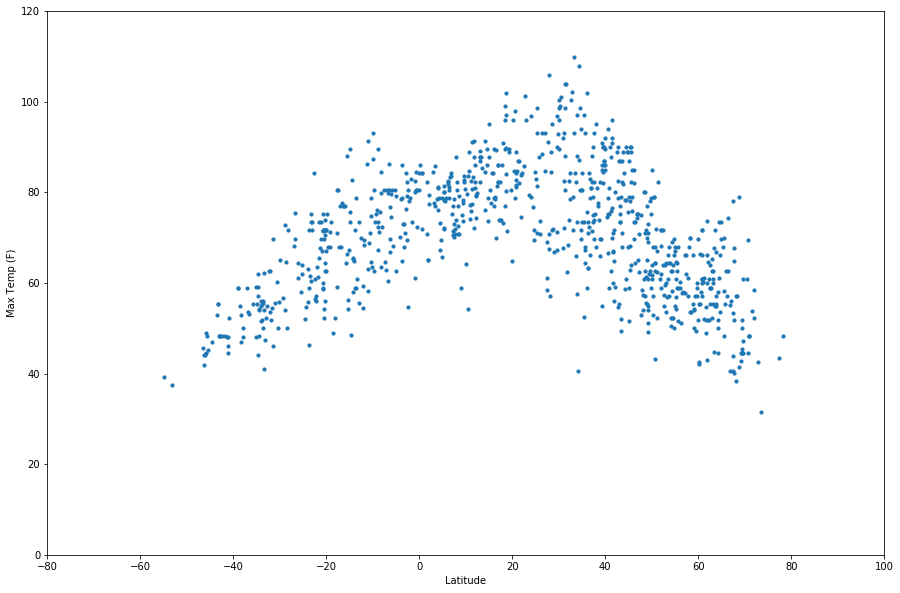

In [33]:
weather_df.plot(kind='scatter', x='Latitude', y='Max Temp (F)', figsize=(15,10), s=10)
plt.xlim(-80, 100)
plt.ylim(0, 120)

#### Latitude vs. Humidity Plot

(-10, 120)

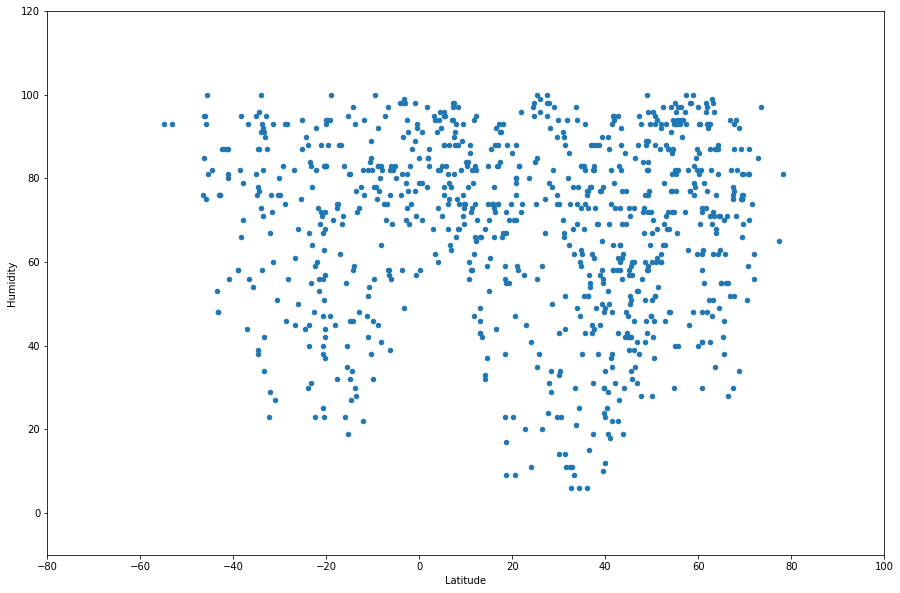

In [36]:
weather_df.plot(kind='scatter', x='Latitude', y='Humidity', figsize=(15,10))
plt.xlim(-80, 100)
plt.ylim(-10, 120)

#### Latitude vs. Cloudiness Plot

(-10, 120)

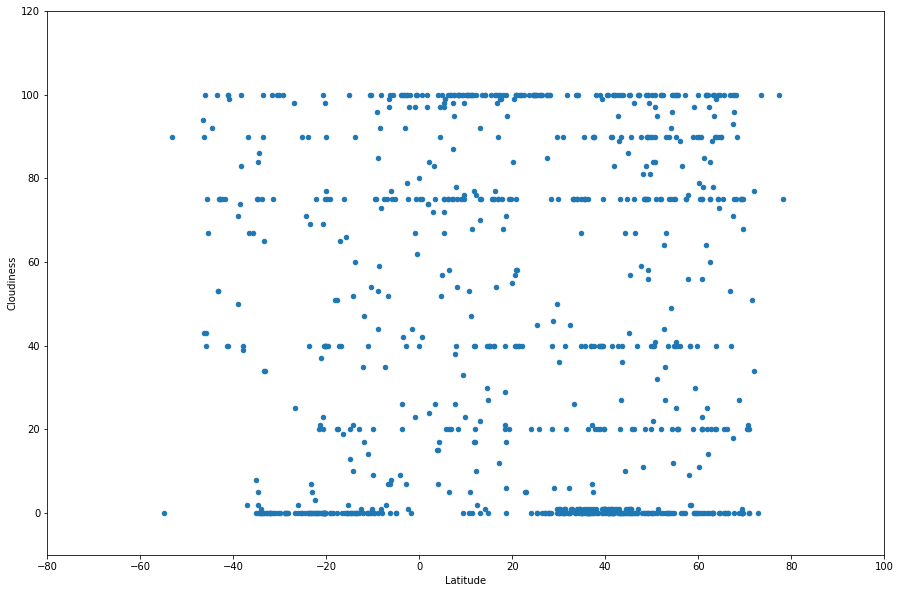

In [35]:
weather_df.plot(kind='scatter', x='Latitude', y='Cloudiness', figsize=(15,10))
plt.xlim(-80, 100)
plt.ylim(-10, 120)

#### Latitude vs. Wind Speed Plot

(-1, 20)

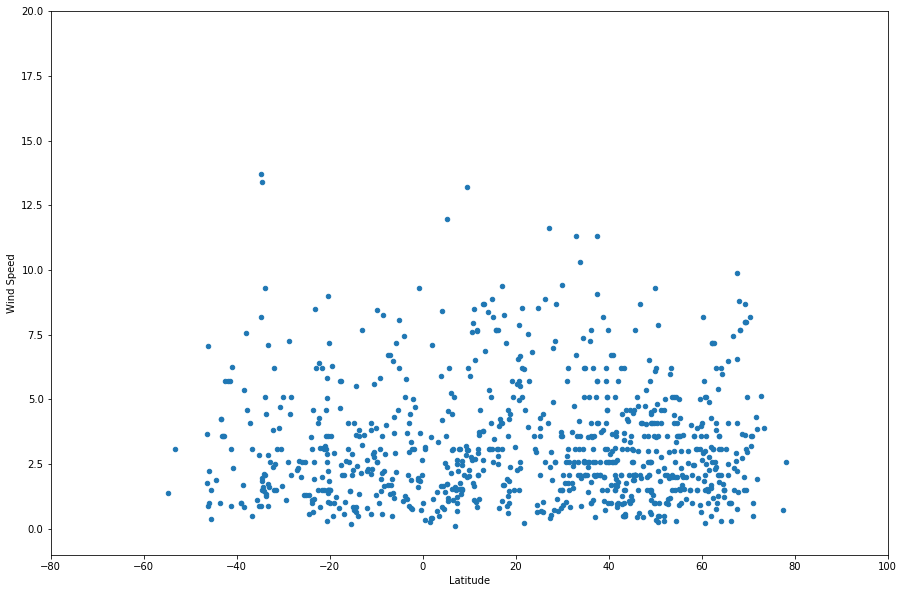

In [39]:
weather_df.plot(kind='scatter', x='Latitude', y='Wind Speed', figsize=(15,10))
plt.xlim(-80, 100)
plt.ylim(-1, 20)